# Lab 2: Histograms, law of large numbers, simulating simple games

Please begin by running the code in the following cell to import the packages that are used in this notebook.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
print ("Modules Imported!")

Modules Imported!


## Plotting a Histogram:

A histogram is a graphical representation of a distribution. It shows the frequency at which values occur. Suppose a probability class has 400 students in it. We can simulate random tests scores (with an average of 70) and plot a histogram. The np.random.rand() function returns a number between 0 and 1. It is from a continuous uniform distribution on this interval. It means that for any $c$ between 0 and 1, the probability the sample number is less than or equal to $c$ is equal to $c.$

Text(0, 0.5, 'Number of Students')

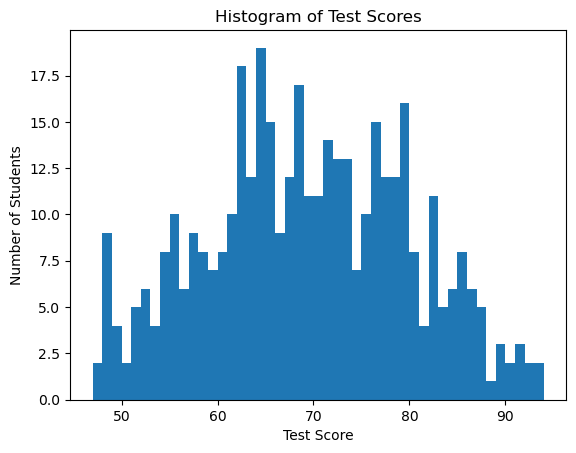

In [2]:
x = np.zeros(400) #Generates an initial array with 400 students
for i in range(400): #Loops through each of the students
    x[i] = (int)(25*(np.random.rand()-np.random.rand())+70) #Generates a random test score for that student
plt.hist(x,bins=int(np.max(x)-np.min(x))) #Plots a Histogram in range of all valid test scores
plt.title("Histogram of Test Scores")
plt.xlabel('Test Score')
plt.ylabel('Number of Students')

For simulation purposes, it is useful to be able to get a value after a single trial of an RV based on a certain distribution. These are called random variates. From the stats module we've used, you simply need to call the rvs function with a size as an input. NumPy also has an easy way to do this through the random module. When you run the code below, you should see two histograms from the same normal distributions. 

Text(0.5, 1.0, 'Histogram of NumPy Normal Distribution')

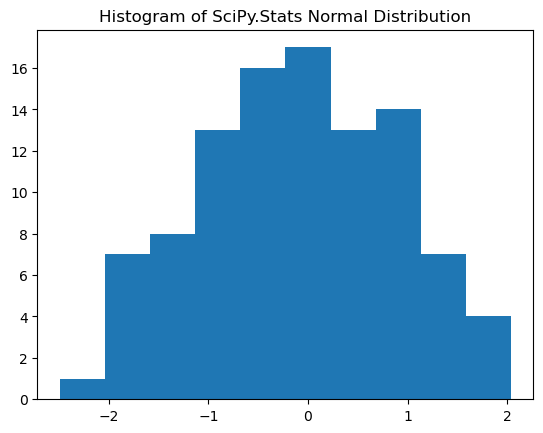

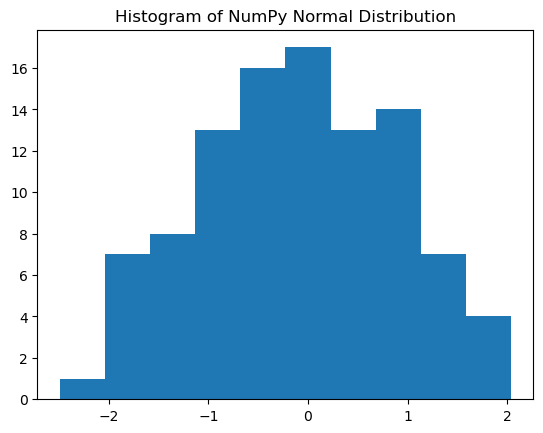

In [3]:
#Simulates a Gaussian RV 100 times in two different ways and creates a histogram

X = st.norm()
np.random.seed(100)
x = X.rvs(size = 100) #Generates a vector with the results of 100 outputs or trials based on the standard Gaussian distribution
np.random.seed(100)
y = np.random.normal(size = 100) #Generates a vector with the results of 100 outputs based on the standard Gaussian distribution
plt.hist(x); #Creates a histogram of those results, the default value for the number of bins is bins=10
plt.title('Histogram of SciPy.Stats Normal Distribution')
plt.figure()
plt.hist(y);
plt.title('Histogram of NumPy Normal Distribution')

The scipy and numpy methods for getting these variates should produce the same results, but the two histograms are different. This is due to the random number generator. If we seed the random number generator before running the methods, they should produce consistent results. In the code there are two commented lines with np.random.seed(100). Uncomment these, and run the code again. You should see the histograms are the same now. Essentially, seeding the random number generator, tells it where to start in it's sequence.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the custom discrete variable you made for a roll of the die in Lab 1, or some other method (include a text cell or a comment in the code to explain your method): 

1. Simulate 100 rolls using the .rvs() method in the stats module. Plot a histogram of the results. Is it what you would expect?
2. Now simulate 10,000 rolls of the die and again plot a histogram. Observe any difference and explain your observation. 

Text(0, 0.5, 'number of time to get #')

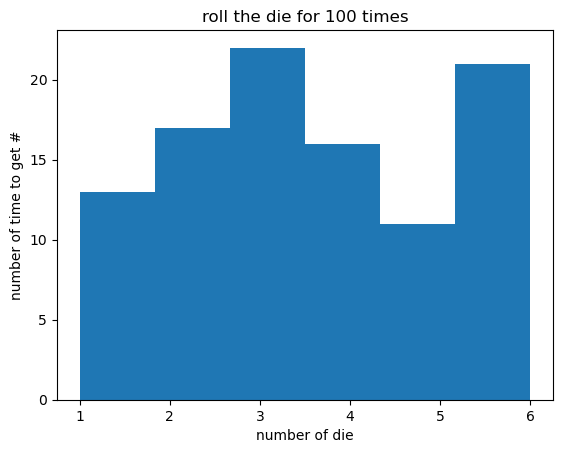

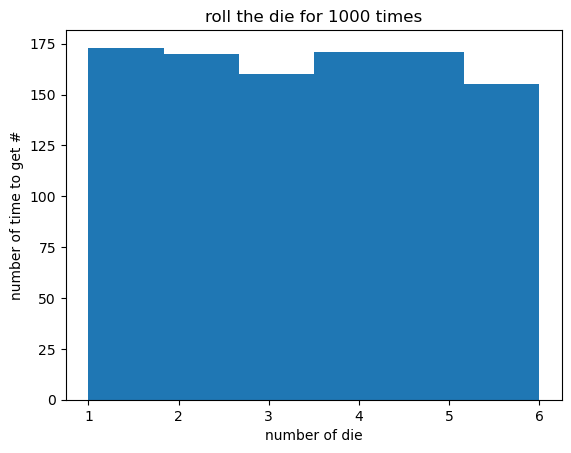

In [4]:
# Your code here
c = (1, 2, 3, 4, 5, 6)                    #set sample space
p = (1/6, 1/6, 1/6, 1/6, 1/6, 1/6)        #probability of each sample
die = st.rv_discrete(values = (c, p))     #create the die

roll_100 = die.rvs(size = 100)            #create the histogram of rolling the die 100 times
plt.hist(roll_100, bins = 6)
plt.title('roll the die for 100 times')
plt.xlabel('number of die')
plt.ylabel('number of time to get #')               

plt.figure()                              
roll_1000 = die.rvs(size = 1000)          #create the histogram of rolling the die 1000 times
plt.hist(roll_1000, bins = 6)
plt.title('roll the die for 1000 times')
plt.xlabel('number of die')
plt.ylabel('number of time to get #')  

__Answer:__ (1. The histogram is what I expected. Because there are too few samples, the probability of each outcome of the rolling could be very different. 2. the histogram become more flat, because there are more samples, so the outcomes are more evenly distributed.)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## The Law of Large Numbers:

The law of large numbers describes the result of performing the same experiment a large number of times. Let $X_1,X_2, \ldots ,X_n$ be a set of uncorrelated random variables, each with a finite mean of $\mu$. Let $S_n$ represent the sum of these random variables: $S_n=X_1+X_2+...+X_n$. The law of large numbers states that $P\left\{\Big|\frac{S_n}{n}-\mu\Big|\ge\delta\right\}\le\frac{C}{n\delta^2}\to0$ as $n\to\infty$. Put another way this simply states that the sum of the RVs divided by n converges in some sense to the mean ($\frac{S_n}{n}\to\mu$). A proof of this is given in the ECE 313 textbook, using a bounded variance assumption and the Chebychev inequality.

To observe this behavior by simulation, let's look at the Poisson distribution. A Poisson RV has a single parameter $\lambda$ which represents the mean number of occurances or counts, such as the mean number of hits your Youtube video gets in a day.  Then the probability that your video gets $i$ hits in one day is given by the pmf: $p(i)=\frac{\lambda^ie^{-\lambda}}{i!}$. So what if you totalled the number of hits you received each day for a week, month, or year and divided by that many days? The law of large numbers asserts that as $n$ gets large this should go to the mean $\lambda$. Below, we create a Poisson distribution where $\lambda=5$ hits per day. We retrieve a random variate each day and model the law of large numbers over time. Try running the cell multiple times and see how much variation there is for different runs.

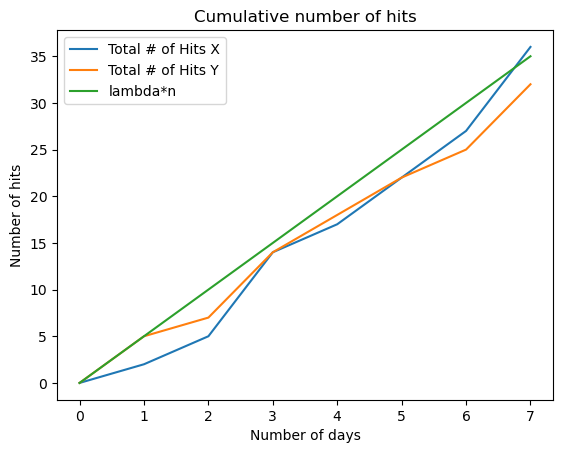

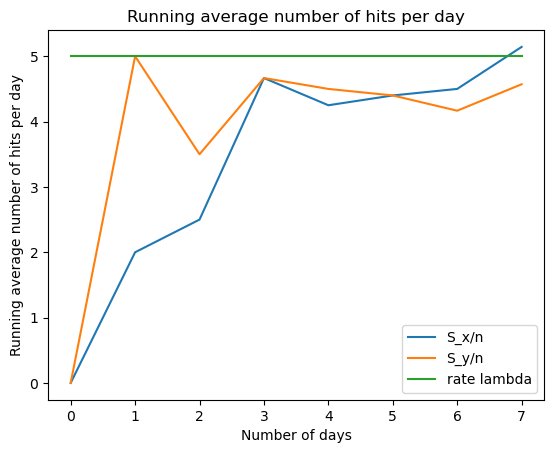

In [5]:
lamb = 5. #Our rate of hits per day
N = 7 #Number of days we are going to simulate over
x = [st.poisson.rvs(lamb)]    #Gets the number of hits on the first day and stores it in a vector
y = [np.random.poisson(lamb)] #Same using numpy instead of scipy.stats
Sx = [0] #Sx will represent cumulative sums of the random variates at different times
Sy = [0] 
Ax = [0.0] #Ax will be an array of averages, Sx/n, at different times
Ay = [0.0]

for n in range(1,N+1): #Simulates over N days
    x.append(st.poisson.rvs(lamb)) #Appends the number of hits of the next day to the vector
    y.append(np.random.poisson(lamb))
    Sx.append(Sx[n-1]+x[n]) #Appends the sum at n to the vector
    Sy.append(Sy[n-1]+y[n])
    Ax.append(Sx[n]/(1.*n)) #Appends the sum over n to the vector
    Ay.append(Sy[n]/(1.*n))

n = np.linspace(0,N,N+1) #Generates an array of N+1 points from 0 to N for graphing purposes

plt.plot(Sx, label = 'Total # of Hits X') #Plots the total number of hits
plt.plot(Sy, label = 'Total # of Hits Y')
plt.plot(n, lamb*n, label = 'lambda*n') #Plots a line based on the rate given
plt.title('Cumulative number of hits')
plt.ylabel('Number of hits')
plt.xlabel('Number of days')
plt.legend()

plt.figure() #Creates a new figure
plt.plot(Ax, label = 'S_x/n') #Plots the average number of hits
plt.plot(Ay, label = 'S_y/n')
plt.plot(lamb*np.ones(N+1), label = 'rate lambda') #Plots the expected average
plt.title('Running average number of hits per day')
plt.ylabel('Running average number of hits per day')
plt.xlabel('Number of days')
plt.legend()

You can play with the above code. Change $\lambda$ or change the number of days we simulate over. You should see that $\frac{S_n}{n}\to\lambda$ as the number of days, $n$, increases. 
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Using your discrete die rolling RV, once again simulate 10000 rolls of the die. 

1. Show graphically that the law of large numbers is maintained for the average of the numbers of the first $n$ rolls as $n\rightarrow\infty.$ 
2. What would be a rough approximation of the sum? Of the average?  

(Note: There is no parameter $\lambda$ associated with the roll of a die.  But the mean value of a roll plays the same role.)

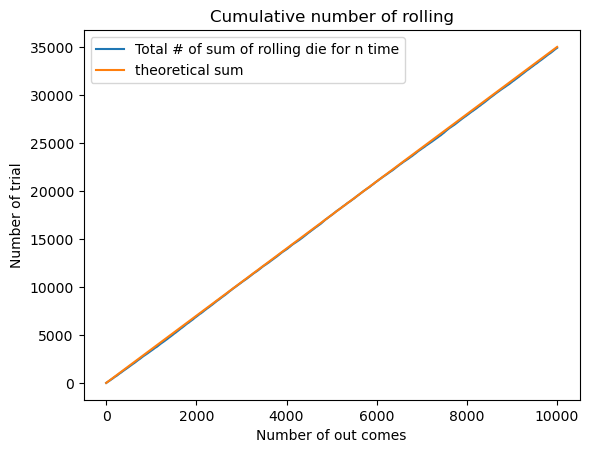

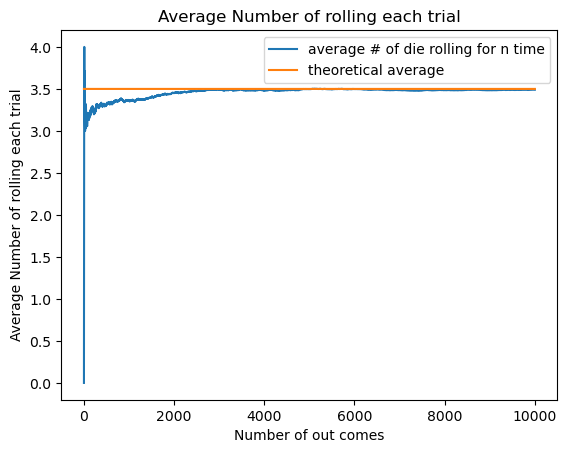

In [6]:
# Your code here
N = 10000
c1 = (1, 2, 3, 4, 5, 6)                      #the outcome of rolling a die
p1 = (1./6, 1./6, 1./6, 1./6, 1./6, 1./6)    #the probability of each outcome
die1 = st.rv_discrete(values = (c1, p1))     #random variable of rolling a die
roll = [die1.rvs()]                          #list recording the number of each roll
die_sum = [0]                                #list recording the total sum at time of n
die_ave = [0]                                #list recording the average at time of n

for i in range(1, N + 1):                    #simulate over n times rolling
    roll.append(die1.rvs())
    die_sum.append(die_sum[i - 1] + roll[i])
    die_ave.append(die_sum[i] / (1.*i))
    
n = np.linspace(0,N,N+1) #Generates an array of N+1 points from 0 to N for graphing purposes
plt.plot(die_sum, label = 'Total # of sum of rolling die for n time')   #plot the sum of when rolling a die for n times
plt.plot(n, 3.5*n, label = 'theoretical sum')                           #plot the theoretical sum
plt.xlabel('Number of out comes')
plt.ylabel('Number of trial')
plt.title('Cumulative number of rolling')
plt.legend()

plt.figure()
plt.plot(die_ave, label = 'average # of die rolling for n time')        #plot the average when rolling a die at the nth time
plt.plot(n, 3.5*np.ones(N+1), label = 'theoretical average')            #plot the theoretical average when rolling the die at nth time
plt.xlabel('Number of out comes')
plt.ylabel('Average Number of rolling each trial')
plt.title('Average Number of rolling each trial')
plt.legend()

__Answer:__ (the rough approximation of the sum is 35000 and the rough approximation of the average is 3.5)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Additional Lab Questions:

**For the completeion of this lab, make sure to do questions 1-2 as well as these two additional questions:**
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** If you thought you could get out of your first probability lab without some questions on poker hands, I'm sorry, but they're too good to pass up. Suppose you draw five cards from a standard 52 card deck.
<ol><li>Calculate the probabilities of getting a TWO PAIR, THREE OF A KIND, FULLHOUSE, and a FLUSH; print out these probabilities. You need to write down your calculation process, either in a markdown or code cell, not just the result probabilities. (Note: FLUSHes include straight/royal FLUSHes) </li> 
<li>Simulate 1,000,000 poker hands, count the number of times you get for each of the above hands and find the empirical probability of getting each of the above hands.  Your simulated hands
should include all possible poker hands. (Hint: One way to represent a random poker hand is to use a 4 by 13 binary array with ones placed at five randomly chosen locations.  The np.sum command can be used to compute row or column sums. If you don't know how to generate random integers in Python, Google is a good source for help.)</li>
<li>Do the probabilities match up relatively well?</li>
</ol>

(For most lab questions in ECE314, you will be graded based on the correctness of your answers, regardless of how you code. However, for part 2 of this problem, you may lose a few points for very inefficient code, e.g. with a lot of for loops and unecessary if structures. As a general guideline, if your program can run in one minute (for 1,000,000 hands), it should be sufficiently efficient, although this is not a hard requirement). 

In [7]:
# Your code here (add addtitional code/markdown cells if needed)

#Part1

from scipy.special import comb

#the total number of possible ways:
num_tot = comb(52, 5)

#the probability of getting a TWO PAIR:
two_pair_num = comb(13, 2) * comb(4, 2) * comb(4, 2) * comb(11, 1) * 4
p_two_pair = two_pair_num / num_tot
print('The probability of getting a TWO PAIR is: ', p_two_pair)

#the probability of getting a THREE OF A KIND:
three_num = 13 * comb(4, 3) * comb(12, 2) * 4 * 4
p_three = three_num / num_tot
print('The probability of getting a THEE OF A KIND is: ', p_three)

#the probability of getting a FULLHOUSE:
fullhouse_num = comb(13, 1) * comb(12, 1) * comb(4, 3) * comb(4, 2)
p_fullhouse = fullhouse_num / num_tot
print('The probability of getting a FULLHOUSE is: ', p_fullhouse)

#the probability of getting a FLUSH:
flush_num = 4 * comb(13, 5)
p_flush = flush_num / num_tot
print('The probability of getting a FLUSH is: ', p_flush)

The probability of getting a TWO PAIR is:  0.0475390156062425
The probability of getting a THEE OF A KIND is:  0.02112845138055222
The probability of getting a FULLHOUSE is:  0.0014405762304921968
The probability of getting a FLUSH is:  0.0019807923169267707


In [8]:
#Part2
import numpy as np

simulation_time = 1000000   #number of simulation time

#counters for each kind of hand:
two_pair_counter = 0
three_counter = 0
fullhouse_counter = 0
flush_counter = 0

#simulated drawing poker hands
simulated_hands = np.zeros((simulation_time, 4, 13)) #each row represents 13 numbers, each column represents the decor of the poker

#check with iteration to count each kind of hands

for i in simulated_hands:
    
    #place five cards:
    indices = np.random.choice(13 * 4, 5, replace = False)    #generate 5 random numbers, each corresponds to a position in the 4*13 matrix 
    row_indices, column_indices = np.unravel_index(indices, (4, 13))  #convert the 5 random numbers into row and column indices
    i[row_indices, column_indices] = 1
    
    
    row_sum = np.sum(i, axis = 0)   #add up all the rows
    column_sum = np.sum(i, axis =1) #add up all the column
    
    if np.sum(row_sum == 2) == 2:   #if two indices in the row-sum is 2, then we have two-pair
        two_pair_counter += 1
    
    if np.sum(row_sum == 3) == 1 and np.sum(row_sum == 2) != 1:   #if one index in the row-sum is 3 and no index in the row-sum is 2, then we have three of a kind
        three_counter += 1
    
    if np.sum(row_sum == 3) == 1 and np.sum(row_sum == 2) == 1:  #if one index in the row-sum is 3 and one index in the row-sum is 2, then we have fullhouse
        fullhouse_counter += 1
    
    if np.sum(column_sum == 5) == 1:  #if one index in the column-sum is 5, then we have flush
        flush_counter += 1
        

#calculate the probability of each situation
two_empirical_p = two_pair_counter / simulation_time
three_empirical_p = three_counter / simulation_time
fullhouse_empirical_p = fullhouse_counter / simulation_time
flush_empirical_p = flush_counter / simulation_time

print('empirical probability of TWO PAIRS: ', two_empirical_p)
print('empirical probability of THREE OF A KIND: ', three_empirical_p)
print('empirical probability of FULLHOUSE: ', fullhouse_empirical_p)
print('empirical probability of FLUSH: ', flush_empirical_p)

empirical probability of TWO PAIRS:  0.047434
empirical probability of THREE OF A KIND:  0.021008
empirical probability of FULLHOUSE:  0.001433
empirical probability of FLUSH:  0.001988


__Answer:__ (Yes, the probabilities match up relatively well.)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>** A classic problem when being introduced to probability is the Monty Hall problem. If you've ever seen "Let's Make a Deal" on television, this problem takes from that show. You're the contestant. The host of the show gives you three doors to choose from. One door chosen at random holds a grand prize and the other two hold worthless items. You choose your door, and then the host reveals one of the doors you didn't choose such that it always holds a worthless item.  (If you initially choose the door with the grand prize, the host reveals either of the other doors with equal probability.) So now there are two doors left and the host asks you whether you would like to switch. What should you do?
<ol><li>Write down your first reaction? Would you switch doors or keep the one you have? Why?</li>
    <li>Create this scenario and simulate the strategy of sticking with the same door 1,000,000 times. What percentage of time did you win?</li>
    <li>Simulate the strategy of switching doors 1,000,000 times. What percentage of time did you win?</li>
    <li>Which strategy would you use now? Explain why this is the case.</li>
</ol>

In the simulation, you can simulate every step that happens in the actual game and exactly as it happens, even for very trivial steps. You can also clever-guess some parts and skip some trivial steps; if you do that, make sure you briefly reason about why you do so in comments, so that the graders know that you understand what actually happens in the game. There is no timing requirement for this problem.  

__Answer of Part 1:__ (I would choose to switch doors. Because there will always be a right door and a wrong door left in the last. But the probability I choose the right door at the first place is 1/3, so I will swich)

In [9]:
# Your code here (add addtitional code/markdown cells if needed)

#Part2
simulate_time = 1000000
noswich_counter = 0                         #count how many time we get the right door by not swiching

for i in range(simulate_time):
    prize_door = np.random.randint(1, 4)    #set grand_prize door
    choose_door = np.random.randint(1, 4)   #randomly choose one door
    if prize_door == choose_door:           #our choice is the right door
        noswich_counter += 1
    
#because we don't swich, the probability only depends on our first pick, so there is no need to simulate the removing process
p_noswich = noswich_counter / simulate_time
print('The percentage of time I win if I dont swich: ', p_noswich)

The percentage of time I win if I dont swich:  0.33352


In [10]:
#Part3
simulate_time1 = 1000000
swich_counter = 0                           #count how many time we get the right door by swiching

for i in range(simulate_time1):
    prize_door1 = np.random.randint(1, 4)   #set grand_prize door
    choose_door1 = np.random.randint(1, 4)  #randomly choose one door
    if prize_door1 != choose_door1:         #if we choose the wrong door at the first place, then the host will remove another 
        swich_counter += 1                  #wrong door for us, then the door after we swich will be the right door
                                            #in the contrary, if we get the right door at the first place, we will swich to the wrong door eventually
p_swich = swich_counter / simulate_time1
print('The percentage of time I win if I swich: ', p_swich)

The percentage of time I win if I swich:  0.666999


__Answer of Part 4:__ (I will use the swiching strategy, because the simulation outcomes show that the swiching probability(0.66) is greater than the non-swiching probability(0.33). This is because when we swich, our wrong choice becomes right choice, and our right choice becomes wrong choice. And the probability of our making wrong choice is 2/3, so the probability of our making the right choice eventually is 2/3.)

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 

In [14]:
p = 0.8
q = 0.2

a = 1 - comb(105, 100)*(p**101)*(q**4) - comb(105, 102)*(p**102)*(q**3) - comb(105, 103)*(p**103)*(q**2) - comb(105, 104)*(p**104)*q - comb(105, 105)*(p**105)
print(a)

0.9999746026077847
